In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("loan_train.csv",index_col=0,header=0)

In [3]:
test = pd.read_csv("loan_test.csv",index_col=0,header=0)

In [4]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
print(train.shape)
print(test.shape)

(614, 12)
(367, 11)


In [6]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [9]:
train.Credit_History.unique()

array([ 1.,  0., nan])

In [10]:
train.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
colname1= ["Gender","Married","Dependents","Self_Employed"]

for x in colname1:
    train[x].fillna(train[x].mode()[0],inplace =True)
    test[x].fillna(test[x].mode()[0],inplace =True)

In [12]:
colname2 = ["Loan_Amount_Term","LoanAmount"]

for x in colname2:
    train[x].fillna(round(train[x].mean(),0),inplace=True)
    test[x].fillna(round(test[x].mean(),0),inplace=True)
    
    
print(train.isnull().sum())
print(test.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [13]:
train["Credit_History"].fillna(value=0,inplace=True)
test["Credit_History"].fillna(value=0,inplace=True)

In [14]:
print(train.isnull().sum())
print(test.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [15]:
from sklearn.preprocessing import LabelEncoder
colname = ["Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"]
le=LabelEncoder()

for x in colname:
    train[x]=le.fit_transform(train[x])

In [16]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [17]:
from sklearn.preprocessing import LabelEncoder
colname = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents"]
le=LabelEncoder()

for x in colname:
    test[x]=le.fit_transform(test[x])

In [18]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2,0,0,2340,2546,100.0,360.0,0.0,2
LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2


<function matplotlib.pyplot.show(close=None, block=None)>

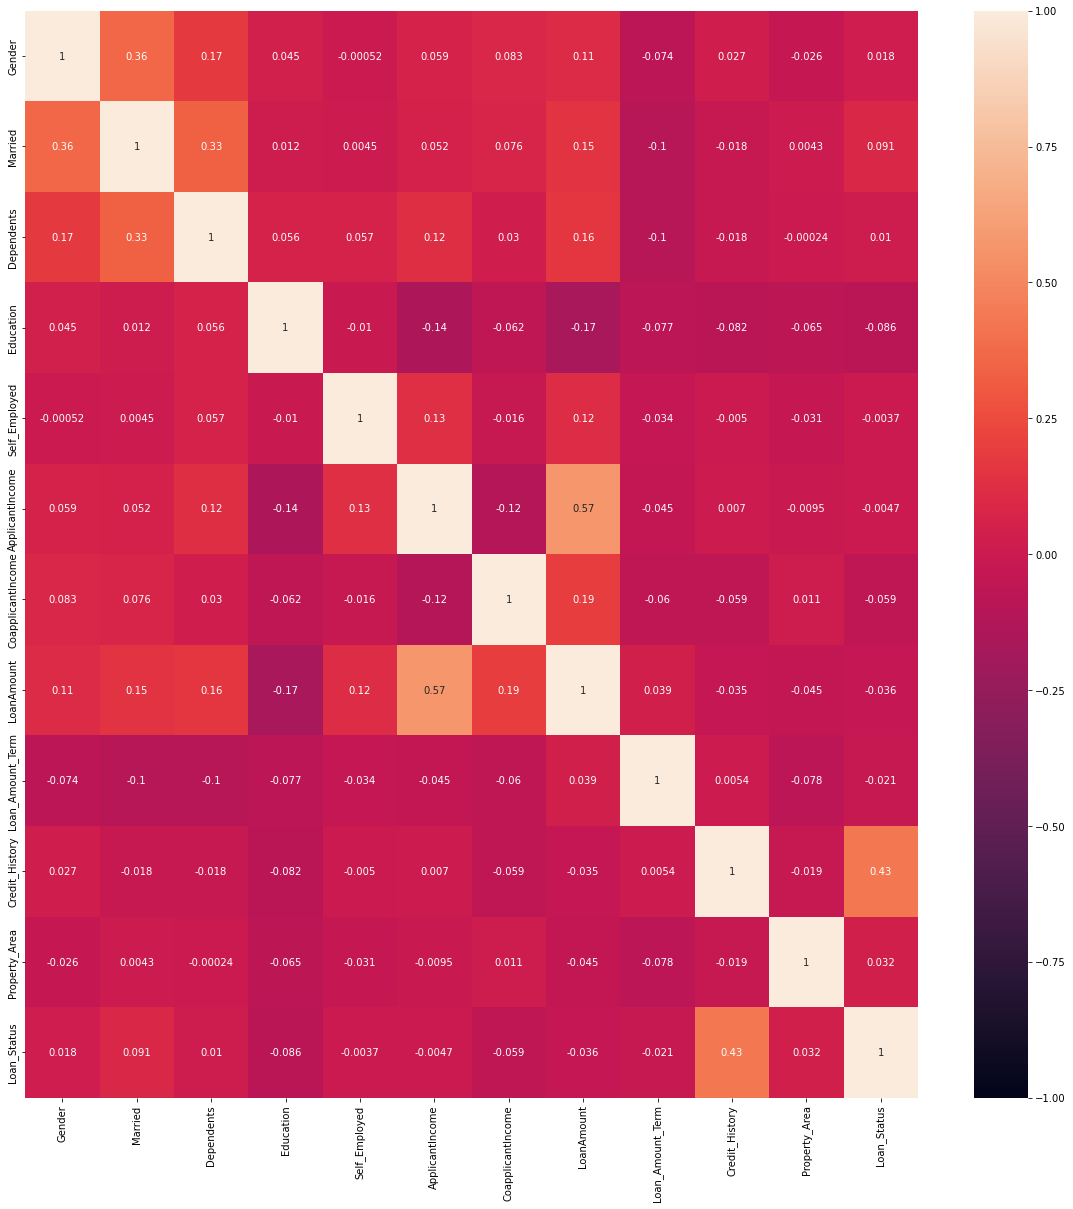

In [19]:
corr_train = train.corr()
corr_train

plt.figure(figsize=(20,20))
sns.heatmap(corr_train,vmin=-1.0,vmax=1.0,annot=True)

plt.show

In [20]:
x_train = train.values[:,0:-1]
y_train = train.values[:,-1]
y_train = y_train.astype(int)

In [21]:
x_train.shape

(614, 11)

In [22]:
y_train.shape

(614,)

In [23]:
x_test = test.values[:,:]

In [24]:
x_test.shape

(367, 11)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
print(x_train)
print(x_test)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.27985054  0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.54095432
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.27985054  0.54095432
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.27985054  0.54095432
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.27985054 -1.84858491
  -0.04760721]]
[[ 0.47234264  0.72881553 -0.73780632 ...  0.27985054  0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.27985054  0.54095432
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.27985054  0.54095432
   1.22329839]
 ...
 [ 0.47234264 -1.37208932 -0.73780632 ...  0.27985054 -1.84858491
  -0.04760721]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.27985054  0.54095432
  -1.31851281]
 [ 0.47234264 -1.37208932 -0.73780632 ... -2.51865489  0.54095432
  -1.31851281]]


In [38]:
from sklearn.svm import SVC
svc_model = SVC(kernel="rbf",C= 20,gamma=0.01)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print(list(y_pred))

[1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 

In [39]:
svc_model.score(x_train,y_train)

0.7768729641693811

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred_new= svc_model.predict(x_train)
cfm = confusion_matrix(y_train,y_pred_new)
print(cfm)

print("Classification report: ",)
print(classification_report(y_train,y_pred_new))

acc = accuracy_score(y_train,y_pred_new)
print("Accuracy of the model:", acc)

[[ 97  95]
 [ 42 380]]
Classification report: 
              precision    recall  f1-score   support

           0       0.70      0.51      0.59       192
           1       0.80      0.90      0.85       422

    accuracy                           0.78       614
   macro avg       0.75      0.70      0.72       614
weighted avg       0.77      0.78      0.77       614

Accuracy of the model: 0.7768729641693811


In [46]:
test = pd.read_csv("loan_test.csv",header=0,index_col=0)
test["Eligiblility"]=y_pred
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Eligiblility
Loan_ID,,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,1
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,1
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1


In [50]:
test["Eligiblility"]=test["Eligiblility"].map({1:"Eligible",0:"Not_eligible"})

In [53]:
test.Eligiblility.value_counts()

Eligible        280
Not_eligible     87
Name: Eligiblility, dtype: int64

In [55]:
test.to_excel(r"Test_data_for_Loan_1.xlsx",index=True)